In [2]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from tqdm import tqdm

# 関数を定義
def metropolis_ising(L, T, num_steps, J=1):
    lattice = np.random.choice([-1, 1], size=(L, L))
    
    for step in range(num_steps):
        i = np.random.randint(L)
        j = np.random.randint(L)
        
        
        # 近傍のスピンの総和を計算（周期境界条件を適用）
        total = lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] + \
                lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
        
        # エネルギー差を計算
        delta_energy = 2 * J * lattice[i, j] * total
        
        if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / T):
            # スピンを反転させる
            lattice[i, j] *= -1
            
        
    # スピン変数全体を反転させるかどうかのif文(いらないかも)
    # 図だと黒の割合が必ず50%以上になるようにしている
    if np.sum(lattice==1) >= L*L/2:
        lattice = lattice*-1
    else:
        lattice = lattice

    lattice = torch.tensor(lattice)
    return lattice

T=1からT=6まで，0.25刻みで配位データを取得

In [42]:
L = 36
num_steps = 100000

spin_data = []
temp_data = []

# 一次元データを得る
for T in tqdm(np.arange(0.0, 6.01, 0.25)):
    # T=0はmetropolis_isingには定義されていないのでT=0.01をT=0のデータとする
    if T==0:
        T = 0.01     
    # 各温度で1000個ずつ配位を作成   
    for i in tqdm(range(3)):
        lattice = metropolis_ising(L, T, num_steps)
        # latticeをspin_dataに追加
        spin_data.append(lattice)
        temp_data.append(T)
# リスト内のすべてのテンソルを1つのテンソルに結合        
spin_data = torch.stack(spin_data)

100%|██████████| 25/25 [00:47<00:00,  1.91s/it]


In [33]:
# 型を確認
print(type(spin_data))
print(type(temp_data))

<class 'torch.Tensor'>
<class 'list'>


In [43]:
# データサイズの確認
print(torch.Tensor.size(spin_data))
print(len(temp_data))

torch.Size([75, 36, 36])
75


tensor([[-1, -1, -1,  ..., -1, -1, -1],
        [-1, -1, -1,  ..., -1, -1, -1],
        [-1, -1, -1,  ..., -1, -1, -1],
        ...,
        [-1, -1, -1,  ..., -1, -1, -1],
        [-1, -1, -1,  ..., -1, -1, -1],
        [-1, -1, -1,  ..., -1, -1, -1]], dtype=torch.int32)


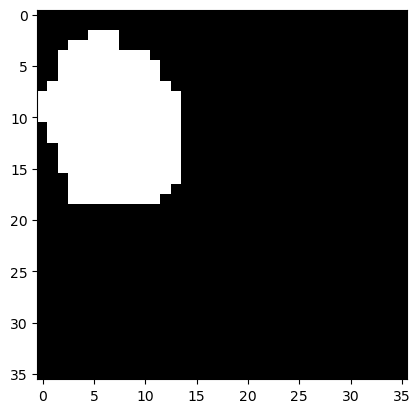

In [44]:
i = 0
print(spin_data[i])
# スピン配位の可視化
plt.imshow(spin_data[i], cmap='gray', interpolation='nearest')
plt.show()

In [ ]:
# Numpy配列をPandasのデータフレームに変換
df = pd.DataFrame(dataset)

# CSVファイルを101列目だけ小数第2位で表示するため
fmt_list = ['%d']*100 + ['%.2f']

# csvファイルで保存
df.to_csv('dataframe.csv', index=False)